In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [186]:
data=pd.read_csv(r"C:\Users\Harikrishnan\OneDrive\Desktop\csv\global air pollution dataset.csv")   
data

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
23458,India,Gursahaiganj,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy
23459,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good
23460,India,Mormugao,50,Good,1,Good,22,Good,1,Good,50,Good
23461,United States of America,Westerville,71,Moderate,1,Good,44,Good,2,Good,71,Moderate


In [187]:
data.isnull().sum()

Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

In [188]:
data.dropna(inplace=True)

In [189]:
data.isnull().sum()

Country               0
City                  0
AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
dtype: int64

In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23035 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23035 non-null  object
 1   City                23035 non-null  object
 2   AQI Value           23035 non-null  int64 
 3   AQI Category        23035 non-null  object
 4   CO AQI Value        23035 non-null  int64 
 5   CO AQI Category     23035 non-null  object
 6   Ozone AQI Value     23035 non-null  int64 
 7   Ozone AQI Category  23035 non-null  object
 8   NO2 AQI Value       23035 non-null  int64 
 9   NO2 AQI Category    23035 non-null  object
 10  PM2.5 AQI Value     23035 non-null  int64 
 11  PM2.5 AQI Category  23035 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.3+ MB


In [191]:
data.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23035.000000,23035.000000,23035.000000,23035.000000,23035.000000
mean,72.344693,1.376254,35.233905,3.084741,68.883482
std,56.360992,1.844926,28.236613,5.281708,55.057396
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,80.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


In [192]:
data.shape

(23035, 12)

In [193]:
data.dtypes

Country               object
City                  object
AQI Value              int64
AQI Category          object
CO AQI Value           int64
CO AQI Category       object
Ozone AQI Value        int64
Ozone AQI Category    object
NO2 AQI Value          int64
NO2 AQI Category      object
PM2.5 AQI Value        int64
PM2.5 AQI Category    object
dtype: object

In [194]:
data.size

276420

In [195]:
data1=data.head(10)

<Axes: xlabel='CO AQI Value', ylabel='AQI Value'>

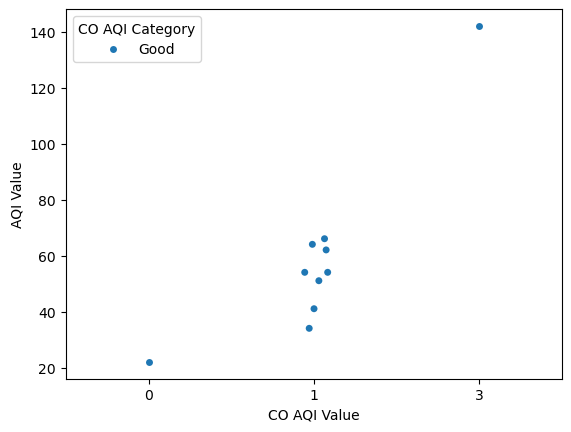

In [196]:
# STRIPPLOT
sns.stripplot(y='AQI Value',x='CO AQI Value',data=data1,hue='CO AQI Category')

<Axes: xlabel='AQI Value', ylabel='CO AQI Value'>

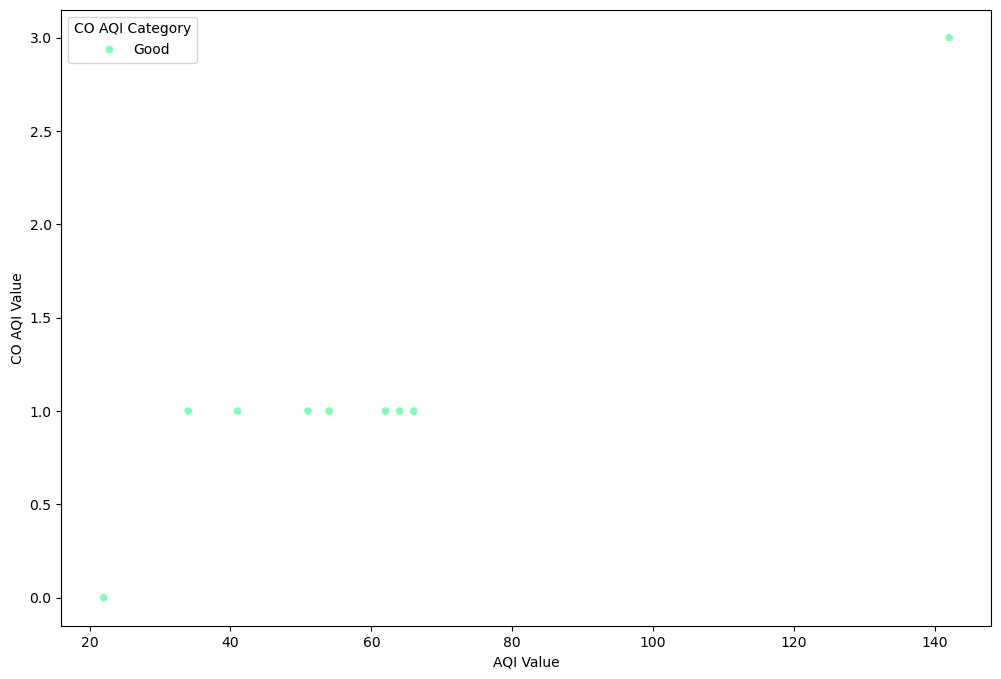

In [197]:
# SCATTERPLOT
plt.figure(figsize=(12,8))
sns.scatterplot(x='AQI Value',y='CO AQI Value',data=data1,hue="CO AQI Category",palette="rainbow")


Text(0, 0.5, 'CO AQI Value')

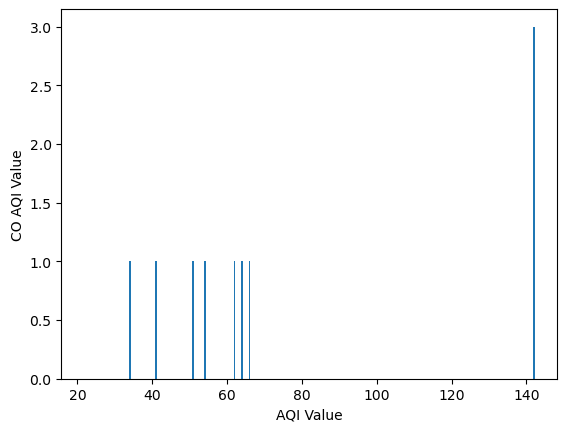

In [198]:
# BARPLOT
plt.bar(data1['AQI Value'],data1['CO AQI Value'],width=0.5)
plt.xlabel('AQI Value')
plt.ylabel('CO AQI Value')

<Axes: xlabel='AQI Category', ylabel='count'>

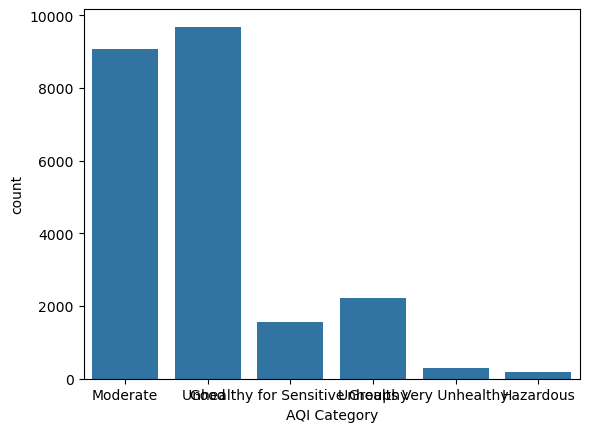

In [199]:
# COUNTPLOT
sns.countplot(x='AQI Category',data=data)

In [200]:
data.head(1)

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate


In [201]:
ob1=LabelEncoder()
ob2=LabelEncoder()
ob3=LabelEncoder()
ob4=LabelEncoder()
ob5=LabelEncoder()
ob6=LabelEncoder()
ob7=LabelEncoder()

data["Country"]=ob1.fit_transform(data["Country"])
data["City"]=ob2.fit_transform(data["City"])
data["AQI Category"]=ob3.fit_transform(data["AQI Category"])
data["CO AQI Category"]=ob4.fit_transform(data["CO AQI Category"])
# data["Ozone AQI Category"]=ob5.fit_transform(data["Ozone AQI Category"])
data["NO2 AQI Category"]=ob6.fit_transform(data["NO2 AQI Category"])
data["PM2.5 AQI Category"]=ob7.fit_transform(data["PM2.5 AQI Category"])


data

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,130,16220,51,2,1,0,36,Good,0,0,51,2
1,22,16240,41,0,1,0,5,Good,1,0,41,0
2,75,16274,66,2,1,0,39,Good,2,0,66,2
3,123,16308,34,0,1,0,34,Good,0,0,20,0
4,54,16382,22,0,0,0,22,Good,0,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...
23458,69,7396,184,3,3,0,154,Unhealthy,2,0,184,3
23459,54,18284,50,0,1,0,20,Good,5,0,50,0
23460,69,13257,50,0,1,0,22,Good,1,0,50,0
23461,166,22180,71,2,1,0,44,Good,2,0,71,2


In [202]:
# data.corr()

<Axes: >

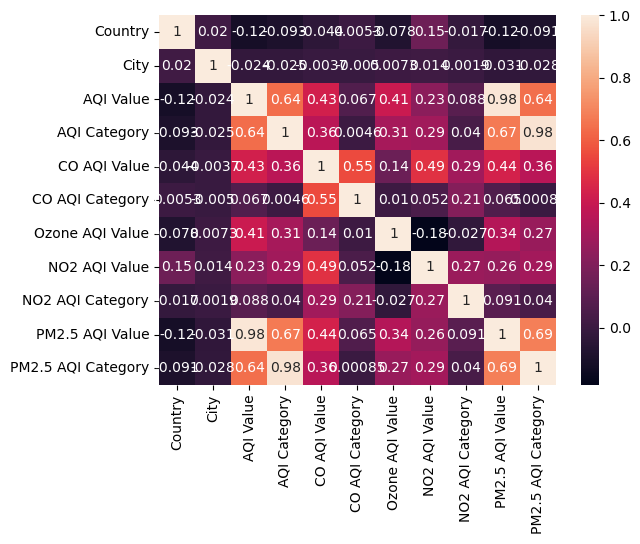

In [203]:
sns.heatmap(data.select_dtypes(['number']).corr(),annot=True)

In [204]:
x=data.drop(["Ozone AQI Category"],axis=1)
y=data['Ozone AQI Category']

**LOGISTIC REGRESSION**

In [206]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

In [207]:
model1=LogisticRegression()
model1.fit(xtrain,ytrain)

LogisticRegression()

In [208]:
print(model1.score(xtrain,ytrain))
print(model1.score(xtest,ytest))

0.9000248077400149
0.900159166546086


In [209]:
ypred1=model1.predict(xtest)
ypred1

array(['Good', 'Good', 'Good', ..., 'Good', 'Moderate', 'Good'],
      dtype=object)

In [210]:
model1.predict([[130,16525,51,2,1,0,36,0,0,51,2]])

array(['Good'], dtype=object)

**DECISION TREE CLASSIFIER**

In [212]:
model2=DecisionTreeClassifier()
model2.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [213]:
print(model2.score(xtest,ytest))
print(model2.score(xtrain,ytrain))

1.0
1.0


In [214]:
model2.predict(xtest)

array(['Good', 'Good', 'Good', ..., 'Good', 'Moderate', 'Good'],
      dtype=object)

In [215]:
ypred2=model2.predict(xtest)
ypred2

array(['Good', 'Good', 'Good', ..., 'Good', 'Moderate', 'Good'],
      dtype=object)

In [216]:
model2.predict([[130,16525,51,2,1,0,36,0,0,51,2]])

array(['Good'], dtype=object)

**KNN CLASSIFIER**

In [218]:
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)

In [219]:
xtest=scaler.transform(xtest)

In [220]:
model3=KNeighborsClassifier(n_neighbors=9)
model3.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=9)

In [221]:
print(model3.score(xtest,ytest))
print(model3.score(xtrain,ytrain))

0.9833598610910144
0.9874720912924833


In [222]:
ypred3=model3.predict(xtest)

In [223]:
print(model3.predict([[130,16525,51,2,1,0,36,0,0,51,2]]))

['Good']


**RANDOM FOREST CLASSIFIER**

In [225]:
model4=RandomForestClassifier(n_estimators=100)
model4.fit(xtrain,ytrain)

RandomForestClassifier()

In [226]:
print(model4.score(xtest,ytest))
print(model4.score(xtrain,ytrain))

1.0
1.0


In [227]:
ypred4=model4.predict(xtest)
ypred4

array(['Good', 'Good', 'Good', ..., 'Good', 'Moderate', 'Good'],
      dtype=object)

**ADABOOST CLASSIFIER**

In [229]:
model5=AdaBoostClassifier(n_estimators=50,learning_rate=0.3,random_state=1)

In [230]:
model5.fit(xtrain,ytrain)

AdaBoostClassifier(learning_rate=0.3, random_state=1)

In [231]:
print(model5.score(xtest,ytest))
print(model5.score(xtrain,ytrain))

0.997829547098828
0.9977052840486231


In [232]:
model5.predict([[130,16525,51,2,1,0,36,0,0,51,2]])

array(['Unhealthy'], dtype=object)

### **GRADIANT BOOST**

In [234]:
model6=GradientBoostingClassifier(n_estimators=250,random_state=1)

In [235]:
model6.fit(xtrain,ytrain)

GradientBoostingClassifier(n_estimators=250, random_state=1)

In [236]:
print(model6.score(xtest,ytest))
print(model6.score(xtrain,ytrain))

1.0
1.0


In [237]:
model6.predict([[130,16525,51,2,1,0,36,0,0,51,2]])

array(['Very Unhealthy'], dtype=object)

In [246]:
Country=input("enter the country:")
Country=ob1.transform([Country])
City=input("enter the city:")
City=ob2.transform([City])
AQI_Value=input("enter AQI Value:")
AQI_Category=input("enter aqi category:")
AQI_Category=ob3.transform([AQI_Category])
CO_AQI_Value=input("enter the co aqi value:")
CO_AQI_Category=input("enter co aqi category:")
CO_AQI_Category=ob4.transform([CO_AQI_Category])
Ozone_AQI_Value=input("enter ozone aqi value:")
NO2_AQI_Value=input("enter no2 aqi value:")
NO2_AQI_Category=input("enter no2 aqi category:")
NO2_AQI_Category=ob6.transform([NO2_AQI_Category])
PM_AQI_Value=input("enter PM_AQI_Value:")
PM_AQI_category=input("enter PM AQI category:")
PM_AQI_category=ob7.transform([PM_AQI_category])
print(model2.predict([[Country[0],City[0],AQI_Value,AQI_Category[0],CO_AQI_Value,CO_AQI_Category[0],Ozone_AQI_Value,NO2_AQI_Value,NO2_AQI_Category[0],PM_AQI_Value,PM_AQI_category[0]]]))

enter the country: Poland
enter the city: Przasnysz
enter AQI Value: 34
enter aqi category: Good
enter the co aqi value: 1
enter co aqi category: Good
enter ozone aqi value: 34
enter no2 aqi value: 0
enter no2 aqi category: Good
enter PM_AQI_Value: 20
enter PM AQI category: Good


['Good']


In [ ]:
# Poland   Przasnysz  34  Good  1  Good  34  0  Good 20 G


In [ ]:
# pip install gradio

In [ ]:
# import gradio as gr

In [ ]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(xtrain)
# X_test_scaled = scaler.transform(xtest)

In [ ]:
# models = {
#     "Logistic Regression": LogisticRegression(),
#     "Random Forest": RandomForestClassifier(n_estimators=100),
#     "KNN": KNeighborsClassifier()
# }
# trained_models = {}
# for name, model in models.items():
#     model.fit(X_train_scaled, ytrain)
#     y_pred = model.predict(X_test_scaled)
#     acc = accuracy_score(ytest, y_pred)
#     trained_models[name] = model
#     print(f"{name} Accuracy: {acc:.2f}")

In [ ]:
# def predict(model_name, *features):
#     model = trained_models[model_name]
#     input_data = np.array([features])
#     input_scaled = scaler.transform(input_data)
#     prediction = model.predict(input_scaled)[0]
#     return "Good ozone aqi" if prediction == 0 else "not good ozone aqi"

# # Create Gradio UI
# with gr.Blocks() as demo:
#     gr.Markdown("# Global air pollution prediction")
#     model_name = gr.Dropdown(choices=list(trained_models.keys()), label="Choose Model")
#     inputs = [gr.Number(label=col) for col in x.columns]
#     output = gr.Textbox(label="Predicted ozone aqi Quality")
#     submit = gr.Button("Predict")
#     submit.click(predict, inputs=[model_name] + inputs, outputs=output)

# demo.launch()